# Laboratorio 4 - Familias de Malware

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

## Parte 1
### Creación del dataset
Para la creación del dataset se analizaron las muestras de malware en una máquina virtual con kali linux. En esta máquina virtual se descomprimió el archivo MALWR.zip y se desempaquetaron los ejecutables con upx. Luego se creó un programa en python para convertir las llamadas al API de los malwares a un csv. Este programa se llama `peheaders.py` y es una adaptación del programa proporcionado en la plataforma. Para introducir los datos de cada malware se ejecutó el siguiente comando en bash (los malwares estan en una carpeta llamada MALWR):

```bash
for filename in MALWR/*
do
python3 peheaders.py $filename
done
```
En el lugar que se ejecuta este comando se guarda un archivo llamado `dataset.csv` el cual es usado en el resto del laboratorio.

### Exploración y pre-procesamiento de datos

In [2]:
df = pd.read_csv("dataset.csv")
df.head(10)

,file,api
0,1F2EB7B090018D975E6D9B40868C94CA,"CloseHandle,WaitForSingleObject,CreateEventA,E..."
1,6FAA4740F99408D4D2DDDD0B09BBDEFD,"CloseHandle,WaitForSingleObject,CreateEventA,E..."
2,33DE5067A433A6EC5C328067DC18EC37,"CloseHandle,WaitForSingleObject,CreateEventA,E..."
3,99A39866A657A10949FCB6D634BB30D5,"CloseHandle,WaitForSingleObject,CreateEventA,E..."
4,650A6FCA433EE243391E4B4C11F09438,"CloseHandle,WaitForSingleObject,CreateEventA,E..."
5,8442AE37B91F279A9F06DE4C60B286A3,"CloseHandle,WaitForSingleObject,CreateEventA,E..."
6,65018CD542145A3792BA09985734C12A,"CloseHandle,WaitForSingleObject,CreateEventA,E..."
7,785003A405BC7A4EBCBB21DDB757BF3F,"CloseHandle,WaitForSingleObject,CreateEventA,E..."
8,A316D5AECA269CA865077E7FFF356E7D,"CloseHandle,WaitForSingleObject,CreateEventA,E..."
9,AAAz2E1B6940985A23E5639450F8391820655,"GetVersionExA,FreeLibrary,GetWindowsDirectoryA..."


In [3]:
names = df["file"]
df = df.drop("file", axis=1)
body = np.array(df['api'])

In [4]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(body)
cv_matrix = cv_matrix.toarray()
vocabulario = cv.get_feature_names_out()
vocabulario.shape
bow = pd.DataFrame(cv_matrix, columns=vocabulario)
bow.head(10)

,1type_info,__cxxframehandler,__dllonexit,__getmainargs,__p___initenv,__p__commode,__p__fmode,__set_app_type,__setusermatherr,_acmdln,...,wcstombs,writefile,wsacleanup,wsagetlasterror,wsasetlasterror,wsastartup,wsprintfa,xz,yapaxi,yaxpax
0,0,0,0,1,0,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,1,0,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,1,0,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
5,0,0,0,1,0,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
6,0,0,0,1,0,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
7,0,0,0,1,0,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
8,0,0,0,1,0,1,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1


## Parte 2
### Implementación del modelo
- #### Método del codo

In [5]:
kmeans_kwargs = {"init": "random", "max_iter": 1000, "random_state": 121}

In [6]:
sse = []

for k in range(1,11):
    model = KMeans(n_clusters=k, **kmeans_kwargs)
    model.fit(bow)
    sse.append(model.inertia_)

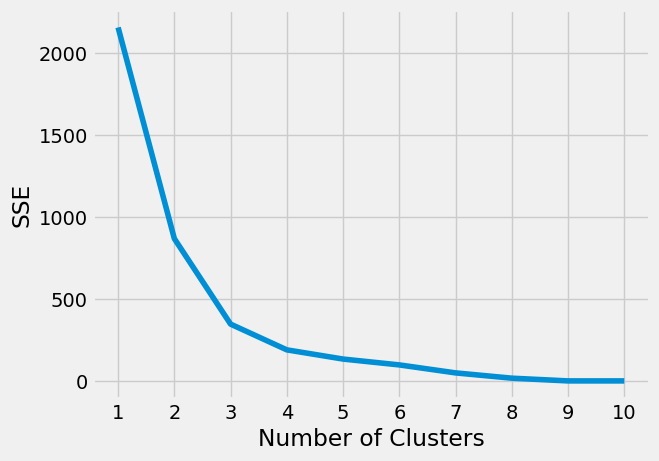

In [7]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

- #### Método de Silhouette

In [8]:
sil_coefficients = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, **kmeans_kwargs)
    model.fit(bow)
    score = silhouette_score(bow, model.labels_)
    sil_coefficients.append(score)

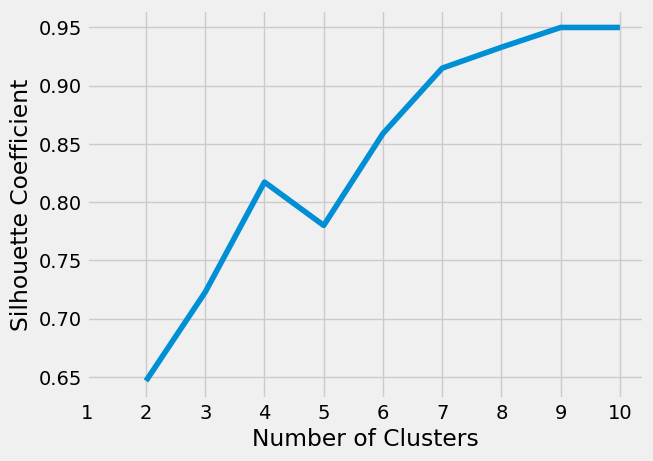

In [9]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), sil_coefficients)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#### Kmeans para k=4

In [10]:
model = KMeans(n_clusters=4, ** kmeans_kwargs)
model.fit(bow)
result_df = pd.DataFrame()
result_df['File'] = names
result_df['Cluster'] = model.labels_
result_df

,File,Cluster
0,1F2EB7B090018D975E6D9B40868C94CA,0
1,6FAA4740F99408D4D2DDDD0B09BBDEFD,0
2,33DE5067A433A6EC5C328067DC18EC37,0
3,99A39866A657A10949FCB6D634BB30D5,0
4,650A6FCA433EE243391E4B4C11F09438,0
5,8442AE37B91F279A9F06DE4C60B286A3,0
6,65018CD542145A3792BA09985734C12A,0
7,785003A405BC7A4EBCBB21DDB757BF3F,0
8,A316D5AECA269CA865077E7FFF356E7D,0
9,AAAz2E1B6940985A23E5639450F8391820655,2


### Conclusiones

1. __¿Para qué número de clústeres se obtiene el coeficiente de Silhouette más alto?__  
Para 9 clústeres se obtiene el coeficiente de Silhouette más alto.
2. __¿Coincide el coeficiente de Silhouette con el método del codo?__  
Pareciera que no coinciden los dos métodos ya que en el método del codo se mira como que el número óptimo de clusteres es 4 porque parece el codo de la gráfica y en el método de Silhouette el número máximo está en el 9. Algo que podemos notar es que en la gráfica de Silhouette vemos que el índice crece constantemente hasta el 4 (coincide con el método del codo), luego baja con 5 clusteres y continúa subiendo del 6-9.  
Podríamos tomar este resultado para concluir que el número óptimo de clusteres es 4 comparando los resultados de los dos métodos
3. __¿Cuántas familias existen entre los ejemplares de malware proporcionados?__  
Utilizando el método de Jaccard se creó una imágen (guardada como `graph.png`) con las distintas familias representadas por grafos. En esta representación hay 8 familias, aunque hay 2 familias con un solo integrante y otras 2 familias que tienen solo 3 integrantes.
4. __¿Coincide el índice de Jaccard con las familias encontradas?__  
No coinciden, el índice de Jaccard muestra 8 familias y con los métodos del codo y de Silhouette se encontraron 4 familias. Esto explica por qué en el método de Silhouette se observa que del 6-9 sigue creciendo la gráfica. También si quitamos las familias que tienen menos de 3 integrantes quedan 4 familias, que eso corresponde a lo que se encontró con los métodos del codo y de Silhouette.